# Data Cleanup of Heart Disease Dataset

---

This Jupyter Notebook was created for the **CardioVision** project by *ClinData Solutions*.

### Prerequisite
The original raw data needs to be combined into a single CSV file, including the fixed Cleveland data.

### Objectives
This Jupyter Notebook focuses on:
- Preparing raw data for the **Exploratory Data Analysis (EDA)**
- Preparing raw data for **predictive machine learning**

---

### Acknowledgements
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigators responsible for the data collection at each institution:

1. **Hungarian Institute of Cardiology, Budapest:** *Andras Janosi, M.D.*
2. **University Hospital, Zurich, Switzerland:** *William Steinbrunn, M.D.*
3. **University Hospital, Basel, Switzerland:** *Matthias Pfisterer, M.D.*
4. **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:** *Robert Detrano, M.D., Ph.D.*

### Original Publication
The first publication that used this dataset is:

*Detrano R, Janosi A, Steinbrunn W, Pfisterer M, Schmid JJ, Sandhu S, et al. International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology. 1989; 64(5):304–10.*

---

# Table of contents

Following parts are covered in this Jupyter Notebook:
1. Importing the raw data csv
2. Selecting relevant features based on Expert opinion
3. Handling Feature Categories
4. Handling Null-Values and Duplicates

## 0. Preparations

Load all needed libraries used in this Jupyter Notebook.

In [1]:
# Libraries for data handling and manipulation
import pandas as pd
import numpy as np

# Libraries / Modules for Imputation of missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Libraries / Modules to visualize data
import matplotlib.pyplot as plt

## 1. Importing the raw data csv

In [4]:
# Load the "selected_raw_data.csv" and save it into a dataframe
selected_raw_data_df = pd.read_csv("selected_raw_data.csv")

# Show the dataframe
selected_raw_data_df

,Dataset,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,Cleveland,1,0,63,1,-9,-9,-9,-9,1,...,1,1,1,1,1,1,1,-9.00,-9.0,name
1,Cleveland,2,0,67,1,-9,-9,-9,-9,4,...,1,1,1,1,1,1,1,-9.00,-9.0,name
2,Cleveland,3,0,67,1,-9,-9,-9,-9,4,...,2,2,1,1,1,7,3,-9.00,-9.0,name
3,Cleveland,4,0,37,1,-9,-9,-9,-9,3,...,1,1,1,1,1,1,1,-9.00,-9.0,name
4,Cleveland,6,0,41,0,-9,-9,-9,-9,2,...,1,1,1,1,1,1,1,-9.00,-9.0,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Long Beach VA,200,0,54,0,1,1,1,-9,4,...,1,1,1,1,1,1,1,0.76,5.6,name
478,Long Beach VA,201,0,62,1,0,0,0,-9,1,...,1,1,1,1,1,1,2,0.62,3.5,name
479,Long Beach VA,202,0,55,1,1,1,1,-9,4,...,2,1,1,1,1,1,1,0.69,5.6,name
480,Long Beach VA,116,0,58,1,1,1,1,-9,4,...,1,1,1,1,1,1,1,0.81,6.0,name


## 2. Selection of Chosen Variables

The original dataset contains 76 features, but only 14 have been widely used in publications so far. Some features describe others; for instance, the boolean "hypertension" feature indicates whether the resting blood pressure value is above or below a certain threshold.

All 14 commonly used features were also identified by our domain expert as they are known risk factors for heart disease. In addition, 4 more features were selected for inclusion in the initial Exploratory Data Analysis (EDA).

### Selected Features Table

| **No.** | **Feature Name** | **Description**                                            | **Feature Type**         |
|---------|------------------|----------------------------------------------------------|--------------------------|
| 1       | age              | Age of the patient                                        | Numerical                |
| 2       | sex              | Sex of the patient (1 = male; 0 = female)                 | Categorical (Binary)     |
| 3       | cp               | Chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) | Categorical              |
| 4       | chol             | Serum cholesterol in mg/dl                                | Numerical                |
| 5       | fbs              | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)     | Categorical (Binary)     |
| 6       | restecg          | Resting electrocardiographic results                      | Categorical              |
| 7       | thalach          | Maximum heart rate achieved                               | Numerical                |
| 8       | exang            | Exercise-induced angina (1 = yes; 0 = no)                 | Categorical (Binary)     |
| 9       | oldpeak          | ST depression induced by exercise relative to rest       | Numerical                |
| 10      | slope            | The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) | Categorical              |
| 11      | ca               | Number of major vessels (0-3) colored by fluoroscopy     | Numerical (Discrete)     |
| 12      | painloc          | Chest pain location (1 = substernal; 0 = otherwise)       | Categorical (Binary)     |
| 13      | htn              | History of hypertension (1 = yes; 0 = no)                 | Categorical (Binary)     |
| 14      | cigs             | Number of cigarettes smoked per day                      | Numerical                |
| 15      | years            | Number of years as a smoker                              | Numerical                |
| 16      | famhist          | Family history of coronary artery disease (1 = yes; 0 = no) | Categorical (Binary)  |
| 17      | thalrest         | Resting heart rate                                       | Numerical                |
| 18      | num              | Diagnosis of heart disease (0-4, representing increasing severity) | Categorical (Ordinal)   |

---





In [5]:
# Create a new df, that keeps only the selected columns.
selected_df = selected_raw_data_df[["age", "sex", "cp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "painloc", "htn",
 "cigs", "years", "famhist", "thalrest", "num"]]

# Display the new df.
selected_df

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,painloc,htn,cigs,years,famhist,thalrest,num
0,63,1,1,233,1,2,150,0,2.3,3,0,-9,1,50,20,1,60,0
1,67,1,4,286,0,2,108,1,1.5,2,3,-9,1,40,40,1,64,2
2,67,1,4,229,0,2,129,1,2.6,2,2,-9,1,20,35,1,78,1
3,37,1,3,250,0,0,187,0,3.5,3,0,-9,0,0,0,1,84,0
4,41,0,2,204,0,2,172,0,1.4,1,0,-9,1,0,0,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,0,4,333,1,1,154,0,0.0,-9,-9,1,0,0,0,1,83,1
478,62,1,1,139,0,1,-9,-9,-9.0,-9,-9,0,0,15,30,0,-9,0
479,55,1,4,223,1,1,100,0,0.0,-9,-9,1,1,20,40,0,74,2
480,58,1,4,385,1,2,-9,-9,-9.0,-9,-9,1,0,10,20,1,-9,0


## 3. Handling Feature Categories

Check all datatypes of the features and change them accordingly to the table above.

In [6]:
# Check the datatypes of the selected data
selected_df.dtypes

,0
age,int64
sex,int64
cp,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64


### Change data types and NaN
The datatype of some features is int64 instead of categorical, as mentioned in the table above.
They should be changed to optimize memory usage and for the machine learning algorithms.

!!! Attention !!!
The dataset uses -9 for NaN values. These should be replaced by NaN again, as numpy and pandas are working with NaN natively.
This needs to be done before changing the datatype to categorical.

In [7]:
# Replace -9 with NaN
selected_df = selected_df.replace(-9, np.nan)

In [8]:
# Convert columns to categorical data types
columns_to_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'painloc', 'htn', 'famhist']

for col in columns_to_convert:
    selected_df[col] = selected_df[col].astype("category")

# Display the data types to confirm the changes
print(selected_df.dtypes)

age            int64
sex         category
cp          category
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
painloc     category
htn         category
cigs         float64
years        float64
famhist     category
thalrest     float64
num            int64
dtype: object


### Rename columns for better understanding for the EDA dataset
| **Current Column**   | **Description**                                             | **New Column Name**            |
|----------------------|-------------------------------------------------------------|--------------------------------|
| `age`                | Age in years                                                | `age`                          |
| `sex`                | Sex (1 = male; 0 = female)                                  | `gender`                       |
| `cp`                 | Chest pain type                                             | `chest_pain_type`              |
| `chol`               | Serum cholesterol in mg/dl                                  | `serum_cholesterol`            |
| `fbs`                | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)       | `high_fasting_blood_sugar`     |
| `restecg`            | Resting electrocardiographic results                        | `resting_ecg_results`          |
| `thalach`            | Maximum heart rate achieved                                 | `max_heart_rate`               |
| `exang`              | Exercise induced angina (1 = yes; 0 = no)                   | `exercise_induced_angina`      |
| `oldpeak`            | ST depression induced by exercise relative to rest          | `st_depression`                |
| `slope`              | The slope of the peak exercise ST segment                   | `st_slope`                     |
| `ca`                 | Number of major vessels (0-3) colored by fluoroscopy        | `num_major_vessels`            |
| `painloc`            | Chest pain location                                         | `chest_pain_location`          |
| `htn`                | History of hypertension (1 = yes; 0 = no)                   | `has_hypertension`             |
| `cigs`               | Cigarettes smoked per day                                   | `cigarettes_per_day`           |
| `years`              | Number of years as a smoker                                 | `years_smoking`                |
| `famhist`            | Family history of coronary artery disease (1 = yes; 0 = no) | `family_history_cad`           |
| `thalrest`           | Resting heart rate                                          | `resting_heart_rate`           |
| `num`                | Diagnosis of heart disease                                  | `heart_disease_diagnosis`      |


In [9]:
# Rename columns based on the provided documentation
selected_df = selected_df.rename(columns={
    'age': 'age',
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'chol': 'serum_cholesterol',
    'fbs': 'high_fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'painloc': 'chest_pain_location',
    'htn': 'has_hypertension',
    'cigs': 'cigarettes_per_day',
    'years': 'years_smoking',
    'famhist': 'family_history_cad',
    'thalrest': 'resting_heart_rate',
    'num': 'heart_disease_diagnosis'
})

selected_df

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,chest_pain_location,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
0,63,1,1,233.0,1.0,2,150.0,0.0,2.3,3.0,0.0,NaN,1.0,50.0,20.0,1.0,60.0,0
1,67,1,4,286.0,0.0,2,108.0,1.0,1.5,2.0,3.0,NaN,1.0,40.0,40.0,1.0,64.0,2
2,67,1,4,229.0,0.0,2,129.0,1.0,2.6,2.0,2.0,NaN,1.0,20.0,35.0,1.0,78.0,1
3,37,1,3,250.0,0.0,0,187.0,0.0,3.5,3.0,0.0,NaN,0.0,0.0,0.0,1.0,84.0,0
4,41,0,2,204.0,0.0,2,172.0,0.0,1.4,1.0,0.0,NaN,1.0,0.0,0.0,1.0,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,0,4,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,83.0,1
478,62,1,1,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15.0,30.0,0.0,NaN,0
479,55,1,4,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,1.0,1.0,20.0,40.0,0.0,74.0,2
480,58,1,4,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,1.0,0.0,10.0,20.0,1.0,NaN,0


### Modification of Target Variable
The current target feature, num (heart disease diagnosis), ranges from 0 to 4, where 0 indicates no heart disease, and 1-4 represent increasing levels of heart disease severity.

To determine whether a binary classification (0 = no heart disease, 1 = heart disease) or a multiclass classification approach is more suitable, the distribution of these classes will be analyzed.

In [10]:
# Checking the distribution of values in the target column
distribution = selected_df['heart_disease_diagnosis'].value_counts().sort_index()

# Calculate the percentage distribution
percentage_distribution = (distribution / len(selected_df)) * 100

percentage_distribution

,count
heart_disease_diagnosis,
0,43.153527
1,21.991701
2,14.937759
3,15.352697
4,4.564315


Due to the observed class imbalance, particularly for num = 4, we will begin with a binary classification approach. All heart disease severity levels (1-4) will be consolidated into a single category labeled as heart disease = True, while 0 will represent heart disease = False.

In [11]:
# Convert heart disease severity into a binary classification
selected_df['heart_disease_diagnosis'] = selected_df['heart_disease_diagnosis'].apply(lambda x: True if x > 0 else False)

# Verify the transformation
selected_df['heart_disease_diagnosis'].value_counts()


,count
heart_disease_diagnosis,
True,274
False,208


The target values are now balanced, with 274 patients classified as having heart disease and 208 patients as not having heart disease.
This balanced dataset will be used for binary classification.

## 4. Handle missing and duplicated values



### Handle Duplicates
Check for duplicates in the data and handle them accordingly.

In [12]:
# Check the dataset for duplicates, if false continue
selected_df.duplicated().any()

True

In [13]:
# Identify the duplicate rows
duplicate_row = selected_df[selected_df.duplicated(keep=False)]

# Display the rows that are identical
print(duplicate_row)

     age gender chest_pain_type  serum_cholesterol high_fasting_blood_sugar  \
421   58      1               3              219.0                      0.0   
469   58      1               3              219.0                      0.0   

    resting_ecg_results  max_heart_rate exercise_induced_angina  \
421                   1           118.0                     1.0   
469                   1           118.0                     1.0   

     st_depression st_slope num_major_vessels chest_pain_location  \
421            0.0      NaN               NaN                 1.0   
469            0.0      NaN               NaN                 1.0   

    has_hypertension  cigarettes_per_day  years_smoking family_history_cad  \
421              1.0                20.0           35.0                1.0   
469              1.0                20.0           35.0                1.0   

     resting_heart_rate  heart_disease_diagnosis  
421                70.0                     True  
469            

Based on the selected features, these entries appear identical. However, when considering all features, there are differences that suggest they represent two distinct individuals. As a result, both entries will be retained in the dataset.

### Check Null Values
The Null/ NaN values were originally replaced by -9. Before converting the to categorical features, the -9 was again replaced by NaN so that the built-in functions are working again.

In [14]:
# Calculate the total number of missing values per feature
missing_values_total = selected_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(selected_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(missing_values_table)

                          Total Missing  Percentage Missing (%)
age                                   0                0.000000
gender                                0                0.000000
chest_pain_type                       0                0.000000
serum_cholesterol                     7                1.452282
high_fasting_blood_sugar              7                1.452282
resting_ecg_results                   0                0.000000
max_heart_rate                       53               10.995851
exercise_induced_angina              53               10.995851
st_depression                        56               11.618257
st_slope                            101               20.954357
num_major_vessels                   200               41.493776
chest_pain_location                 282               58.506224
has_hypertension                      3                0.622407
cigarettes_per_day                   15                3.112033
years_smoking                        17 

### Evaluation of Missing Values

To handle missing values in the dataset, two strategies are proposed:

1. **Strategy 1**: Drop specific features and rows to create a dataset entirely free of missing values.
2. **Strategy 2**: Impute as many missing values as possible to retain as much data as possible.

#### Features with a High Percentage of Missing Values
The features `num_major_vessels` and `chest_pain_location` have the highest missing values with 41.5% and 58.5%, respectively. This is primarily due to the absence of these features in the Cleveland dataset. Such high percentages make imputation unreliable. Additionally, `num_major_vessels` has a known correlation with heart disease, making it too obvious as a predictive feature. Therefore, both `num_major_vessels` and `chest_pain_location` are dropped in both strategies.

#### Features with a Medium Percentage of Missing Values
The following features have a moderate percentage of missing values (greater than 10%):

- `max_heart_rate`: 10.99%
- `exercise_induced_angina`: 10.99%
- `st_depression`: 11.62%
- `st_slope`: 20.95%
- `resting_heart_rate`: 11.20%

In **Strategy 1**, entries containing these missing values will be dropped. This might result in losing more than 20% of the data, but the exact impact will be evaluated after dropping. In **Strategy 2**, these missing values will be imputed, allowing us to retain more entries.

#### Features with a Low Percentage of Missing Values
The following features have a relatively low percentage of missing values (less than 10%):

- `serum_cholesterol`: 1.45%
- `high_fasting_blood_sugar`: 1.45%
- `has_hypertension`: 0.62%
- `cigarettes_per_day`: 3.11%
- `years_smoking`: 3.53%
- `family_history_cad`: 1.66%

For both strategies, attempts should be made to impute these missing values, especially for numeric features, as this will ensure that minimal information is lost from the dataset.

These steps provide a structured approach to handling missing data and will ensure that the analysis remains as accurate and comprehensive as possible.


## Splitting the data into two subsets
Create two new df copies of the selected_df to work on strategy 1 (dropping all nan) and strategy 2 (imputing as many nan as possible).

In [15]:
# New df for strategy 1
drop_nan_df = selected_df.copy()

# New df for strategy 1
imputation_df = selected_df.copy()

## Strategy 1: Complete Case
In this strategy, all features with two many missing values will be droppend and afterwards the few remaining rows that contain NaN will also be dropped. Through this, only complete cases are included in the analysis.
This file will be used for the EDA, since it is not modified through imputation.

In [16]:
# Step 1: Drop the features with a high percentage of missing values
drop_nan_df = drop_nan_df.drop(columns=['num_major_vessels', 'chest_pain_location', 'st_slope'])

# Step 2: Drop rows containing any missing values
drop_nan_df = drop_nan_df.dropna()


### Check for missing values again ###
# Calculate the total number of missing values per feature
missing_values_total = drop_nan_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(drop_nan_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(f"There are {len(drop_nan_df)} entries in the drop_nan_df.")
print(missing_values_table)

There are 396 entries in the drop_nan_df.
                          Total Missing  Percentage Missing (%)
age                                   0                     0.0
gender                                0                     0.0
chest_pain_type                       0                     0.0
serum_cholesterol                     0                     0.0
high_fasting_blood_sugar              0                     0.0
resting_ecg_results                   0                     0.0
max_heart_rate                        0                     0.0
exercise_induced_angina               0                     0.0
st_depression                         0                     0.0
has_hypertension                      0                     0.0
cigarettes_per_day                    0                     0.0
years_smoking                         0                     0.0
family_history_cad                    0                     0.0
resting_heart_rate                    0                     0.

### Change the numeric value to actual categories for the EDA dataset
The numeric value should be changed to the actual category to make the analytics better understandable.

In [17]:
# Convert 'gender' to descriptive labels (ensuring data is of int type first)
drop_nan_df['gender'] = drop_nan_df['gender'].astype(int).replace({1: 'Male', 0: 'Female'})

# Convert 'cp' (chest pain) to descriptive labels
drop_nan_df['chest_pain_type'] = drop_nan_df['chest_pain_type'].astype(int).replace({
    1: 'Typical Angina',
    2: 'Atypical Angina',
    3: 'Non-Anginal Pain',
    4: 'Asymptomatic'
})

# Convert 'high_fasting_blood_sugar' to True/False
drop_nan_df['high_fasting_blood_sugar'] = drop_nan_df['high_fasting_blood_sugar'].astype(bool)

# Convert 'resting_ecg_results' to descriptive labels
drop_nan_df['resting_ecg_results'] = drop_nan_df['resting_ecg_results'].astype(int).replace({
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
})

# Convert 'exercise_induced_angina' to True/False
drop_nan_df['exercise_induced_angina'] = drop_nan_df['exercise_induced_angina'].astype(bool)

# Convert 'family_history_cad' to True/False
drop_nan_df['family_history_cad'] = drop_nan_df['family_history_cad'].astype(bool)


## Finally print the resulting df to check it again

In [18]:
# Perform full descriptive analysis of the dataset to check if all works
drop_nan_df.describe(include='all')

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
count,396.000000,396,396,396.000000,396,396,396.000000,396,396.000000,396.0,396.000000,396.000000,396,396.000000,396
unique,NaN,2,4,NaN,2,3,NaN,2,NaN,2.0,NaN,NaN,2,NaN,2
top,NaN,Male,Asymptomatic,NaN,False,Normal,NaN,False,NaN,1.0,NaN,NaN,True,NaN,True
freq,NaN,302,223,NaN,313,187,NaN,228,NaN,241.0,NaN,NaN,230,NaN,217
mean,55.896465,NaN,NaN,228.366162,NaN,NaN,140.916667,NaN,1.086869,NaN,18.224747,17.810606,NaN,73.075758,NaN
std,8.962475,NaN,NaN,81.405749,NaN,NaN,26.153599,NaN,1.131071,NaN,18.516568,16.070950,NaN,13.130863,NaN
min,29.000000,NaN,NaN,0.000000,NaN,NaN,69.000000,NaN,-0.500000,NaN,0.000000,0.000000,NaN,37.000000,NaN
25%,50.000000,NaN,NaN,204.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,64.000000,NaN
50%,57.000000,NaN,NaN,234.500000,NaN,NaN,143.000000,NaN,0.950000,NaN,20.000000,20.000000,NaN,72.000000,NaN
75%,62.000000,NaN,NaN,270.000000,NaN,NaN,161.000000,NaN,1.800000,NaN,30.000000,30.000000,NaN,82.000000,NaN


## 5. Save the resulting df to csv files

Save one csv file for each approach:
- 1. complete_case_data.csv
- 2. machine_learning_data.csv

In [23]:
drop_nan_df.to_csv("complete_case_data.csv", index=False)
imputation_df.to_csv("machine_learning_data.csv", index=False)

## Decision basis for using only Cleveland and Long Beach Data
Overview of the results of missing data for each individual dataset.

| **Feature**                | **Cleveland Data (Total Missing)** | **Cleveland Data (%)** | **Hungarian Data (Total Missing)** | **Hungarian Data (%)** | **Switzerland Data (Total Missing)** | **Switzerland Data (%)** | **Long Beach Data (Total Missing)** | **Long Beach Data (%)** |
|----------------------------|-----------------------------------|------------------------|------------------------------------|-------------------------|--------------------------------------|--------------------------|-------------------------------------|-------------------------|
| age                        | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| gender                     | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| chest_pain_type            | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| serum_cholesterol          | 0                                 | 0.00%                  | 23                                 | 7.82%                    | 0                                    | 0.00%                     | 7                                   | 3.5%                    |
| high_fasting_blood_sugar   | 0                                 | 0.00%                  | 8                                  | 2.72%                    | 75                                   | 60.98%                    | 7                                   | 3.5%                    |
| resting_ecg_results        | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 0                                   | 0.0%                    |
| max_heart_rate             | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 53                                  | 26.5%                   |
| exercise_induced_angina    | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 53                                  | 26.5%                   |
| st_depression              | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 6                                    | 4.88%                     | 56                                  | 28.0%                   |
| st_slope                   | 0                                 | 0.00%                  | 190                                | 64.63%                   | 17                                   | 13.82%                    | 101                                 | 50.5%                   |
| num_major_vessels          | 2                                 | 0.71%                  | 290                                | 98.64%                   | 118                                  | 95.93%                    | 198                                 | 99.0%                   |
| chest_pain_location        | 282                               | 100.00%                | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| has_hypertension           | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 30                                   | 24.39%                    | 3                                   | 1.5%                    |
| cigarettes_per_day         | 5                                 | 1.77%                  | 293                                | 99.66%                   | 112                                  | 91.06%                    | 10                                  | 5.0%                    |
| years_smoking              | 5                                 | 1.77%                  | 294                                | 100.00%                  | 121                                  | 98.37%                    | 12                                  | 6.0%                    |
| family_history_cad         | 0                                 | 0.00%                  | 293                                | 99.66%                   | 121                                  | 98.37%                    | 8                                   | 4.0%                    |
| resting_heart_rate         | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 54                                  | 27.0%                   |
| heart_disease_diagnosis    | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |


# Exploratory Data Analysis (EDA)

---



In [65]:
data = pd.read_csv("complete_case_data.csv")
data.head()

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
0,63,Male,Typical Angina,233.0,True,Left Ventricular Hypertrophy,150.0,False,2.3,1.0,50.0,20.0,True,60.0,False
1,67,Male,Asymptomatic,286.0,False,Left Ventricular Hypertrophy,108.0,True,1.5,1.0,40.0,40.0,True,64.0,True
2,67,Male,Asymptomatic,229.0,False,Left Ventricular Hypertrophy,129.0,True,2.6,1.0,20.0,35.0,True,78.0,True
3,37,Male,Non-Anginal Pain,250.0,False,Normal,187.0,False,3.5,0.0,0.0,0.0,True,84.0,False
4,41,Female,Atypical Angina,204.0,False,Left Ventricular Hypertrophy,172.0,False,1.4,1.0,0.0,0.0,True,71.0,False


## 1. Distribution of heart attacks in the dataset


heart_disease_diagnosis
True     217
False    179
Name: count, dtype: int64


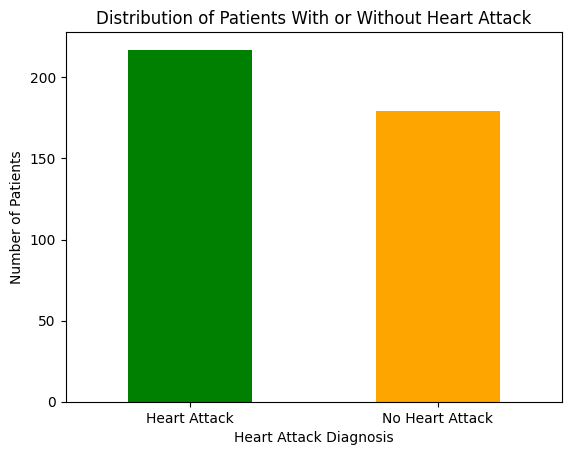

In [69]:
heart_attack_distribution = data['heart_disease_diagnosis'].value_counts()

print(heart_attack_distribution)

heart_attack_distribution.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Heart Attack Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients With or Without Heart Attack')
plt.xticks(ticks=[0, 1], labels=['Heart Attack', 'No Heart Attack'], rotation=0)
plt.show()


***ANALYSIS*** : This will be our target class (Heart attck). This dataset is somehow balanced between patients that had a heart attack and those who did not. A balanced dataset ensures that the
class is more or less evenly represented (1). In the context of supervised machine learning, especially in classification tasks, balance means that the number of samples in each class is similar, which will:
  - Improve model accuracy and generalization
  - Reduce overfitting
  - Improve metric performance
  - In areas like healthcare, give decisions are critical, balanced datasets help ensure that predictions are equitable across different groups
  
Reference:   
(1) Haixiang G, Yijing L, Shang J, Mingyun G, Yuanyue H, Bing G. Learning from class-imbalanced data: Review of methods and applications. Expert Systems with Applications. 2017;73:220-239.





## 2. Age-based analysis

What is the average age of patients having heart attacks?

In [6]:
high_risk_patients = data[data['heart_disease_diagnosis'] == True]

avg_age_high_risk = high_risk_patients['age'].mean()

print(f'Average age of high-risk patients: {avg_age_high_risk}')


Average age of high-risk patients: 57.94930875576037


Show the average in both genders?

In [50]:
high_risk_patients = data[data['heart_disease_diagnosis'] == True]

avg_age_high_risk_male = high_risk_patients[high_risk_patients['gender'] == 'Male']['age'].mean()
avg_age_high_risk_female = high_risk_patients[high_risk_patients['gender'] == 'Female']['age'].mean()

print(f'Average age of high-risk male patients: {avg_age_high_risk_male}')
print(f'Average age of high-risk female patients: {avg_age_high_risk_female}')


Average age of high-risk male patients: 57.84615384615385
Average age of high-risk female patients: 58.86363636363637


***ANALYSIS*** : In the dataset used, the average age of patients having heart attacks in both genders is between 57-58 years old.

## 3. Heart attacks analysis by gender and age brackets


<ipython-input-7-b590eb69ea98>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_distribution = high_risk_patients.groupby(['gender', 'age_group']).size().unstack(fill_value=0)


age_group  <40  40-50  50-60  60-70  70-80  >80
gender                                         
Female       0      1      8     13      0    0
Male         5     25     80     72     13    0


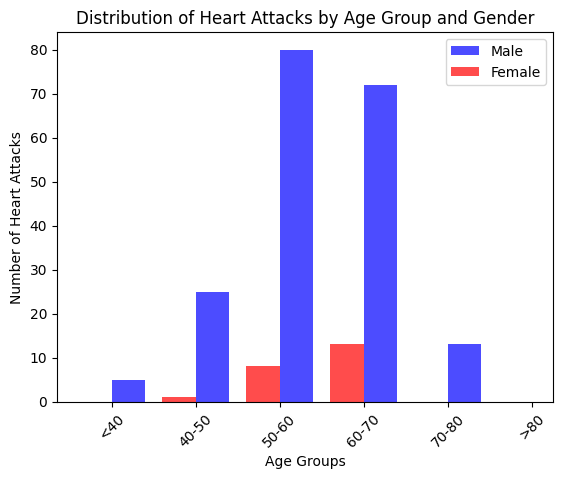

In [7]:
bins = [0, 40, 50, 60, 70, 80, float('inf')]
labels = ['<40', '40-50', '50-60', '60-70', '70-80', '>80']


data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

high_risk_patients = data[data['heart_disease_diagnosis'] == True]


heart_attack_distribution = high_risk_patients.groupby(['gender', 'age_group']).size().unstack(fill_value=0)


print(heart_attack_distribution)


import matplotlib.pyplot as plt

heart_attack_distribution.loc['Male'].plot(kind='bar', color='blue', alpha=0.7, label='Male', position=0, width=0.4)

heart_attack_distribution.loc['Female'].plot(kind='bar', color='red', alpha=0.7, label='Female', position=1, width=0.4)

plt.xlabel('Age Groups')
plt.ylabel('Number of Heart Attacks')
plt.title('Distribution of Heart Attacks by Age Group and Gender')
plt.legend()
plt.xticks(rotation=45)
plt.show()


gender
Male      195
Female     22
Name: count, dtype: int64


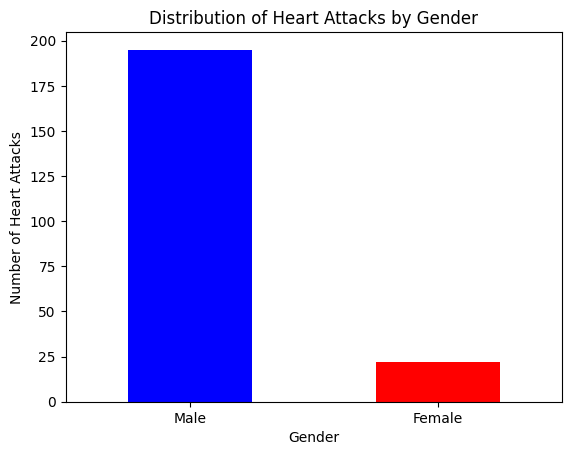

In [8]:
high_risk_patients = data[data['heart_disease_diagnosis'] == True]


heart_attack_distribution_by_gender = high_risk_patients['gender'].value_counts()


print(heart_attack_distribution_by_gender)


import matplotlib.pyplot as plt


heart_attack_distribution_by_gender.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Heart Attacks')
plt.title('Distribution of Heart Attacks by Gender')
plt.xticks(rotation=0)
plt.show()


***ANALYSIS*** : Most of the patients having heart attacks are males (almost 90%). Most of the male patients having heart attacks are having them between age of 50-60 for males. On the other hand, females in this dataset had most of heart attacks betwen 60 and 70 years old. These findings are consistent with the known high risk of ischaemic heart disease (IHD) particularly in middle age men reported in the literature (1), meaning middle age men face a disproportionately higher risk of heart attacks, which had been explained by a combination of biological, behavioral, and lifestyle factors :
  - Hormonal Influence: Men generally have higher rates of heart attacks during middle age is often linked to the protective role of estrogen.
  - Higher prevalence of risk factors : Middle-aged men are more likely to have risk factors such as smoking, hypertension, and obesity, which contribute to a higher incidence of heart attacks (2).
  - Stress and Behavioral Patterns: Middle-aged men often face stressors related to work, financial responsibilities, and lifestyle choices (such as higher alcohol consumption and poor diet), which further elevate the risk of cardiovascular events (3).
  
  Studies consistently show that middle-aged men experience more heart attacks compared to women, particularly between the ages of 40 and 60 (4).

References:

  (1) Kannel WB, et al. "Factors of risk in the development of coronary heart disease--six-year follow-up experience: The Framingham Study." Annals of Internal Medicine. 1961;55(1):33-50.

  (2) Gąsior M, et al. "Gender-related differences in the risk factors, clinical presentation, and outcomes of patients with acute coronary syndrome: Results from the Polish Registry of Acute Coronary Syndromes (PL-ACS)." Journal of Cardiovascular Medicine. 2016;17(11):797-804.

  (3) Reibis R, et al. "Gender differences in risk factor management in patients with coronary heart disease: Results from the Euro Heart Survey on Coronary Prevention." European Journal of Preventive Cardiology. 2012;19(6):1105-1112.

  (4) Roger VL, et al. "Heart disease and stroke statistics—2012 update: a report from the American Heart Association." Circulation. 2012;125(1)



## 4. Heart attacks relationship with exercise induced angina


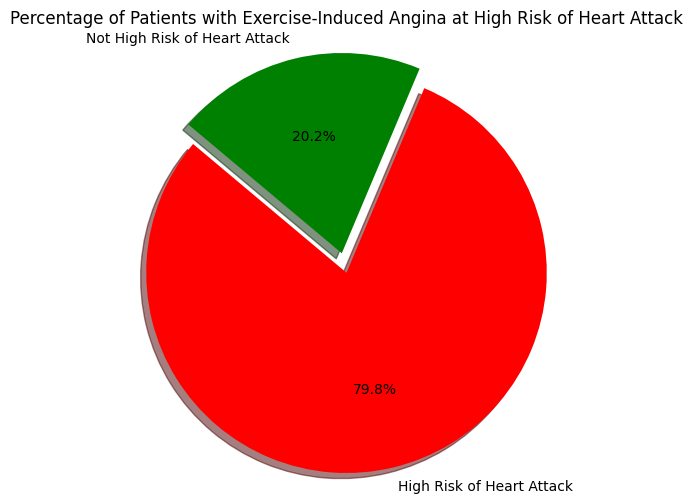

In [9]:
angina_patients = data[data['exercise_induced_angina'] == True]


high_risk_angina_patients = angina_patients[angina_patients['heart_disease_diagnosis'] == True]


percentage_high_risk = (len(high_risk_angina_patients) / len(angina_patients)) * 100
percentage_not_high_risk = 100 - percentage_high_risk

labels = ['High Risk of Heart Attack', 'Not High Risk of Heart Attack']
sizes = [percentage_high_risk, percentage_not_high_risk]
colors = ['red', 'green']
explode = (0.1, 0)  # explode the 'High Risk' slice for emphasis

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Patients with Exercise-Induced Angina at High Risk of Heart Attack')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


***ANALYSIS*** : Exercise is one of the major known prescipitants of chest pain. We wanted to understand if this feature was prominent in the patients having heart attacks from our dataset. Indeed, almost 80% of patients who had a heart attack, did reported angina brought up by exercise.

Exercise-induced or provoked angina is a symptom of ischaemic heart disease (IHD) and is associated with an increased risk of heart attacks (myocardial infarction). Several studies have explored this relationship, highlighting the connection between exercise-provoked angina, underlying ischemia, and cardiovascular events.

This is one of the basis of using "treadill test" or "cardiac stress test". Patients with exercise-induced angina who develop ischemia during cardiac stress testing are at a significantly higher risk of heart attacks. The inability of coronary arteries to supply sufficient blood during exercise leads to myocardial ischemia, which, if persistent, can result in a heart attack (1-2).

Medical literature supports the notion that patients with exercise-induced angina show a higher risk for major adverse cardiac events (MACE), including myocardial infarction and death, compared to those without such symptoms during stress testing (3). In fact, angina, especially when provoked by exercise, is a key indicator of coronary artery blockage. Such blockages can rupture, leading to a thrombotic event, which results in a heart attack (4).

Later in this notebook, in our diagnostic analysis, we will look at how strong or not is the relationship between exercise-provoked angina and an elevated risk of heart attacks, which in turn could be a key feature for early detection of ischaemic heart disease.



References:

(1) Lauer MS, Froelicher ES, Williams M, Kligfield P. "Exercise testing in asymptomatic adults: A statement for professionals from the American Heart Association Council on Clinical Cardiology, Subcommittee on Exercise, Cardiac Rehabilitation, and Prevention." Circulation. 2005;112(5):771-776.

(2) Mark DB, Shaw L, Harrell FE, et al. "Prognostic value of a treadmill exercise score in outpatients with suspected coronary artery disease." New England Journal of Medicine. 1991;325(12):849-853.

(3) Shaw LJ, Mieres JH, Hendel RH, et al. "Comparative effectiveness of exercise electrocardiography with or without myocardial perfusion single-photon emission computed tomography in women with suspected coronary artery disease: Results from the What is the Optimal Method for Ischemia Evaluation in Women (WOMEN) trial." Journal of the American College of Cardiology. 2011;58(14):1404-1414.

(4) Braunwald E. "Angina pectoris and coronary artery disease." The American Journal of Medicine. 1989;86(4A):4-12.




## 5. Assessing chest pain types: what kind of chest pain patients with heart attacks mostly experienced if any?

heart_disease_diagnosis  False  True 
chest_pain_type                      
Asymptomatic                54    169
Atypical Angina             38     12
Non-Anginal Pain            73     28
Typical Angina              14      8


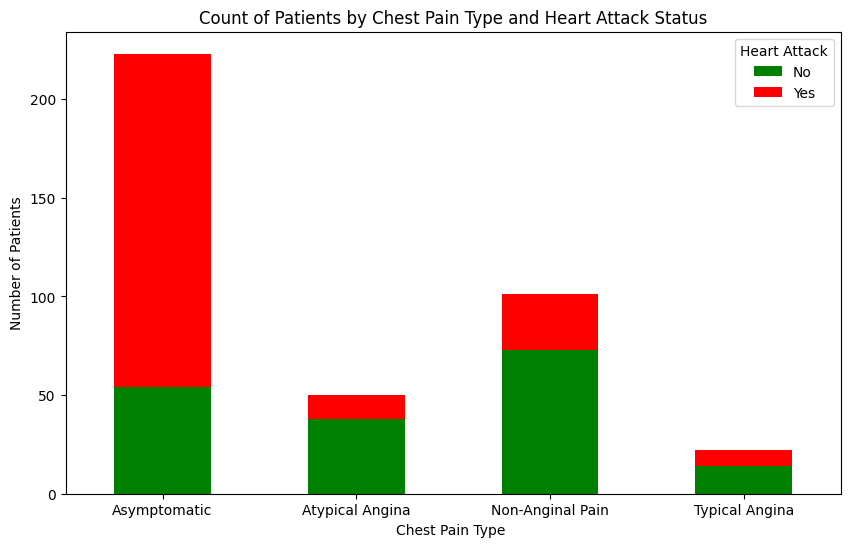

In [10]:
import seaborn as sns

chest_pain_heart_attack_count = data.groupby(['chest_pain_type', 'heart_disease_diagnosis']).size().unstack()

print(chest_pain_heart_attack_count)


chest_pain_heart_attack_count.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Count of Patients by Chest Pain Type and Heart Attack Status')
plt.xlabel('Chest Pain Type ')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()




***ANALYSIS*** : Surprisingly, most of the patients who had heart attacks in our dataset did NOT have typical angina (very few indeed did - less than 4% of patients). In fact, a substantial percentage of patients (almost 76%) who had a heart attack had no chest pain at all (were asymptomatic).

Another interesting observation in patients who did not have a heart attack:  40% did experience pain but it was non anginal. 30% were asymptomatic.

Atypical angina refers to chest pain or discomfort that does not fit the classic description of angina or the characteristic pain caused by myocardial ischemia. The relationship between atypical angina and heart attack (myocardial infarction) risk has been explored in various studies, with results showing that although atypical angina presents a lower immediate risk compared to typical angina, it still represents a significant marker for underlying coronary artery disease (CAD) and future cardiovascular events. Clinical practice and litearature supports the notion that atypical chest pain symptoms still had a considerable risk of developing coronary artery disease and myocardial infarction, and therefore should not be disregarded, especially in patients with other cardiovascular risk factors (1).

Research had pointed out that patients with atypical angina are at risk of underdiagnosis or delayed diagnosis, which may contribute to worse outcomes when myocardial infarction occurs. Although the chest pain is less predictable, patients presenting with atypical symptoms are at an increased risk of CAD and future heart attacks (2). Furthermore, patients with atypical angina, while having a lower short-term risk of myocardial infarction compared to those with typical angina, still require thorough diagnostic workups due to the potential for underlying ischemia and CAD. Unaddressed, these patients remain at risk for heart attacks, especially if their symptoms progress (3).

Asymptomatic patients who did not have chest pain or angina despite having a heart attack are described in the literature as having a "silent" heart attack. Various medical studies have explored reasons why some patients, particularly certain groups, may not experience chest pain during a heart attack. A well known group of patients in this category are diabetic patients. Diabetes is a well established cause of silent heart attacks. Patients with diabetes often develop neuropathy, which can impair the nerves responsible for detecting pain in the chest. As a result, these patients may not feel the pain associated with ischemia or infarction (4). Other well known group who more likely have silent heart attacks are older adults. With age, the sensitivity to pain diminishes, and older individuals might not recognize or feel chest pain as younger people do (5). Gender differences had also been stablished. Women are more likely to experience non pain related symptoms, such as fatigue, nausea, or shortness of breath, rather than chest pain. Hormonal differences, especially in younger women, are thought to play a role (6). Lastly, Other factors which could explain silent heart attacks are lack of awareness of chest pain as a symptom (Patients may attribute symptoms like indigestion, fatigue, or mild discomfort to other less serious conditions, thereby not recognizing the onset of a heart attack) and differences in pain perception (7).

These factors indicate that many patients, especially those with diabetes, older adults, and women, may not experience the classic symptom of chest pain during a heart attack, which makes early detection and prevention strategies challenging to rely on this symptom, particularly given our dataset was imbalance in terms of gender in patients who had heart attacks (90% were males) and the average age of having heart attacks was 57-58 years old.

How this feature  help the ML algorithm to predict heart attack risk will need to be seen with care in our dashboard development given the interesting type of pain patterns patients in our dataset had.

Next, lets have a look at the distribution of diabetes in patients who had heart attack in our dataset to see if this could contribute to the amount of asymptomatic patients having heart attacks (if correlation is shown).

References:

(1) Patel H, et al. "Prognostic implications of anginal symptoms: Insights from the CASS registry." Circulation. 2000;101(8):946-951.

(2) Brieger D, et al. "Atypical chest pain in patients with acute coronary syndromes: Clinical and prognostic implications." The American Journal of Cardiology. 2004;93(5):574-578.

(3) Papanicolaou MN, et al. "Atypical angina: Prognostic significance and clinical presentation in ischemic heart disease." European Heart Journal. 2005;26(12):1255-1260.

(4) Koistinen MJ. "Prevalence of asymptomatic myocardial ischaemia in diabetic subjects." British Medical Journal (BMJ). 1990;301(6743):92-95.

(5) Canto JG, et al. "Atypical presentations among Medicare beneficiaries with unstable angina pectoris." American Journal of Cardiology. 2002;90(3):248-253.

(6) DeVon HA, et al. "Symptoms across the continuum of acute coronary syndromes: Differences between women and men." American Journal of Critical Care. 2008;17(1):14-24.

(7) Canto JG, et al. "Symptom presentation of women with acute coronary syndromes: Myth vs reality." Archives of Internal Medicine. 2007;167(22):2405-2413.















## 5. Do patients having high sugar levels had more heart attacks?

                          Count  Percentage
high_fasting_blood_sugar                   
False                       164   75.576037
True                         53   24.423963


<ipython-input-11-9409ca3c0825>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = high_fasting_blood_sugar_percentages[i]


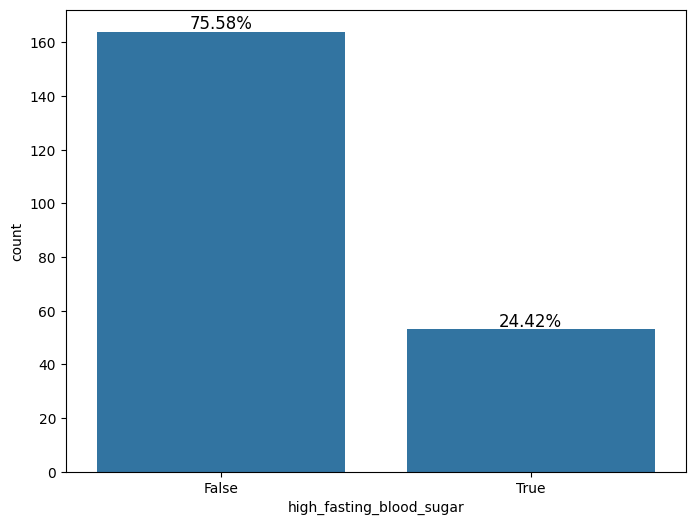

In [11]:
heart_attack_patients = data[data['heart_disease_diagnosis'] == True]


high_fasting_blood_sugar_counts = heart_attack_patients['high_fasting_blood_sugar'].value_counts()
high_fasting_blood_sugar_percentages = heart_attack_patients['high_fasting_blood_sugar'].value_counts(normalize=True) * 100


high_fasting_blood_sugar_distribution = pd.DataFrame({
    'Count': high_fasting_blood_sugar_counts,
    'Percentage': high_fasting_blood_sugar_percentages
})

print(high_fasting_blood_sugar_distribution)


plt.figure(figsize=(8, 6))
sns.countplot(data=heart_attack_patients, x='high_fasting_blood_sugar')


for i, count in enumerate(high_fasting_blood_sugar_counts):
    percentage = high_fasting_blood_sugar_percentages[i]
    plt.text(i, count + 1, f'{percentage:.2f}%', ha='center', fontsize=12)




***ANALYSIS*** : Well, in our dataset most of the patients who had heart attacks did NOT have high blood sugar levels more than 120 mg/dl (75%).

Lets unpack few considerations here:

  - The cut off blood sugar level (BSL) used in the dataset was 120 mg/dl. Why this particular cut off was chosen is unknown. This unit of measure (mg/dl)is used mainly in the US.
  
  - The cut off in the dataset (120 mg/dl) is a number that falls in a term called "prediabetes" or impaired fasted glucose by Diabetes.org and other sources which ranges between 110 mg/dl and 125 mg/dl (1-3). This poses challenges as it is not a measure of diabetes, neither a total measure of impaired glucose tolerance (a patient with a BSL of 115 mg/dl will have impaired glucose tolerance but is below the dataset cut off of 120 mg/dl).

  - Therefore, the interpretation of this feature in relation to high risk of heart disease is difficult to assess as it is not a good cut off measure of neither diabetes o impaired glucose intolerance, which are known risk factors of IHD.

  - This is important consideration for our ML prediction task of IHD.


References:

(1) American Diabetes Association. Diagnosis of diabetes [Internet]. Arlington, VA: American Diabetes Association; [cited 2024 Sep 28]. Available from: https://diabetes.org/about-diabetes/diagnosis.

(2) American Diabetes Association. Guidelines and recommendations for laboratory analysis in the diagnosis and management of diabetes mellitus [Internet]. Diabetes Care. 2023 Oct;46(10)
. Available from: https://diabetesjournals.org/care/article/46/10/e151/153425/Guidelines-and-Recommendations-for-Laboratory.

(3) Centers for Disease Control and Prevention. Diabetes tests [Internet]. Atlanta: CDC; [cited 2024 Sep 28]. Available from: https://www.cdc.gov/diabetes/diabetes-testing/index.html.





## 6. Cholesterol levels analysis: how many patients with heart disease have abnormal cholesterol levels (Above 200 mg/dl)? What percentage of patients that had heart attacks have a cholesterol equal or more than 240 mg/dl ?


Count of patients with serum cholesterol > 200 mg/dL: 167
Percentage of patients with serum cholesterol > 200 mg/dL: 76.96%


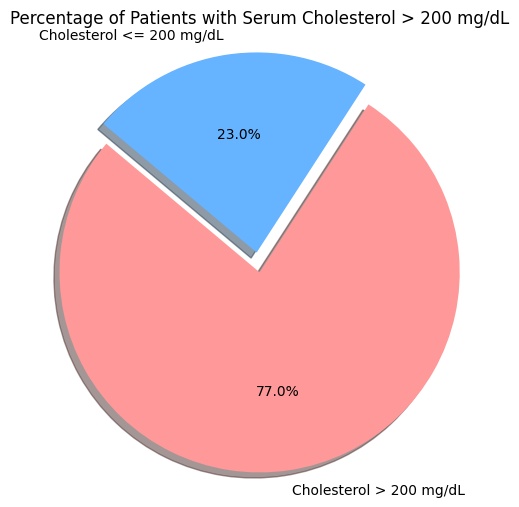

In [24]:
heart_disease_patients = data[data['heart_disease_diagnosis'] == True]

high_cholesterol_patients = heart_disease_patients[heart_disease_patients['serum_cholesterol'] > 200]

high_cholesterol_count = high_cholesterol_patients.shape[0]

total_heart_disease_patients = heart_disease_patients.shape[0]

percentage_high_cholesterol = (high_cholesterol_count / total_heart_disease_patients) * 100


print(f"Count of patients with serum cholesterol > 200 mg/dL: {high_cholesterol_count}")
print(f"Percentage of patients with serum cholesterol > 200 mg/dL: {percentage_high_cholesterol:.2f}%")

def plot_pie_chart():
    labels = ['Cholesterol > 200 mg/dL', 'Cholesterol <= 200 mg/dL']
    sizes = [percentage_high_cholesterol, 100 - percentage_high_cholesterol]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # explode the first slice (cholesterol > 200 mg/dL)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Percentage of Patients with Serum Cholesterol > 200 mg/dL')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


plot_pie_chart()



Count of patients with serum cholesterol > 240 mg/dL: 107
Percentage of patients with serum cholesterol > 240 mg/dL: 49.31%


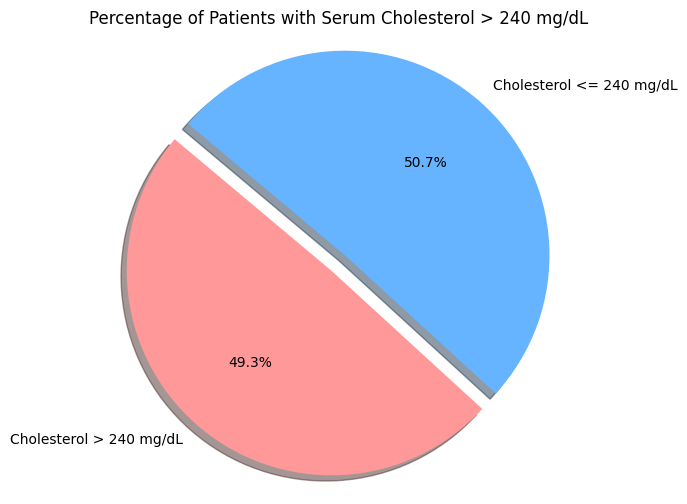

In [19]:
heart_disease_patients = data[data['heart_disease_diagnosis'] == True]


high_cholesterol_patients = heart_disease_patients[heart_disease_patients['serum_cholesterol'] > 240]


high_cholesterol_count = high_cholesterol_patients.shape[0]


total_heart_disease_patients = heart_disease_patients.shape[0]


percentage_high_cholesterol = (high_cholesterol_count / total_heart_disease_patients) * 100


print(f"Count of patients with serum cholesterol > 240 mg/dL: {high_cholesterol_count}")
print(f"Percentage of patients with serum cholesterol > 240 mg/dL: {percentage_high_cholesterol:.2f}%")


def plot_pie_chart():
    labels = ['Cholesterol > 240 mg/dL', 'Cholesterol <= 240 mg/dL']
    sizes = [percentage_high_cholesterol, 100 - percentage_high_cholesterol]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # explode the first slice (cholesterol > 200 mg/dL)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Percentage of Patients with Serum Cholesterol > 240 mg/dL')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_pie_chart()


***ANALYSIS*** : The cholesterol levels measured in the dataset are total cholesterol levels. The unit of measurement again is mg/dl which is usually used in the US.

According to Cleveland Clinic (which was one of the centers where our dataset comes from) cholesterol levels are considered "heart healthy" below 200 mg/dl. Above 200 mg/ dl is considered abnormal or "at risk" and above 240 mg/dl is considered, not only by Cleveland Clinic but by most medical guidelines and studies as a cut off indicative of high risk for ischemic heart disease (IHD).

In our dataset, 77% of patients who had a heart attacks have indeed abnormal, "at risk" serum cholesterol levels and 49% total serum cholesterol above 240 mg/dL which is a critical cut off and risk factor for ischemic heart disease.

Elevated total cholesterol levels increase the risk of plaque formation in the arteries, leading to atherosclerosis and IHD.

We will assess this feature in the diagnostic analysis to assess if statistically correlates with our target class (heart disease) and its relevance in its prediction.

References:

(1) Cleveland Clinic. Cholesterol numbers: What do they mean? [Internet]. 2022 [cited 2024 Sep 28]. Available from: https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

(2) National Cholesterol Education Program (NCEP). Detection, evaluation, and treatment of high blood cholesterol in adults (Adult Treatment Panel III). Circulation. 2002;106(25):3143-421.

(3) Mach F, Baigent C, Catapano AL, et al. 2019 ESC/EAS Guidelines for the management of dyslipidaemias: lipid modification to reduce cardiovascular risk. Eur Heart J. 2020 Jan 1;41(1):111-188.

(4) Grundy SM, Stone NJ, Bailey AL, et al. 2018 AHA/ACC/AACVPR/AAPA/ABC/ACPM/ADA/AGS/APhA/ASPC/NLA/PCNA guideline on the management of blood cholesterol. J Am Coll Cardiol. 2019 Jun;73(24)



## 7. Heart rate measurements distribution in patients who had heart disease

Patients in our dataset performed exercise testing protocols in the bike. During these exercise tests, maximum heart rate achieved and resting heart rate were measured.

What was the lowest, average and highest measurement of both heart rates (rest and max achieved) during the testing in patients that did end up diagnosed of having heart disease?



Resting Heart Rate Stats:
Min Resting Heart Rate: 37.00
Average Resting Heart Rate: 71.10
Max Resting Heart Rate: 109.00

Max Heart Rate Stats:
Min Max Heart Rate: 71.00
Average Max Heart Rate: 131.23
Max Max Heart Rate: 195.00


<Figure size 1000x600 with 0 Axes>

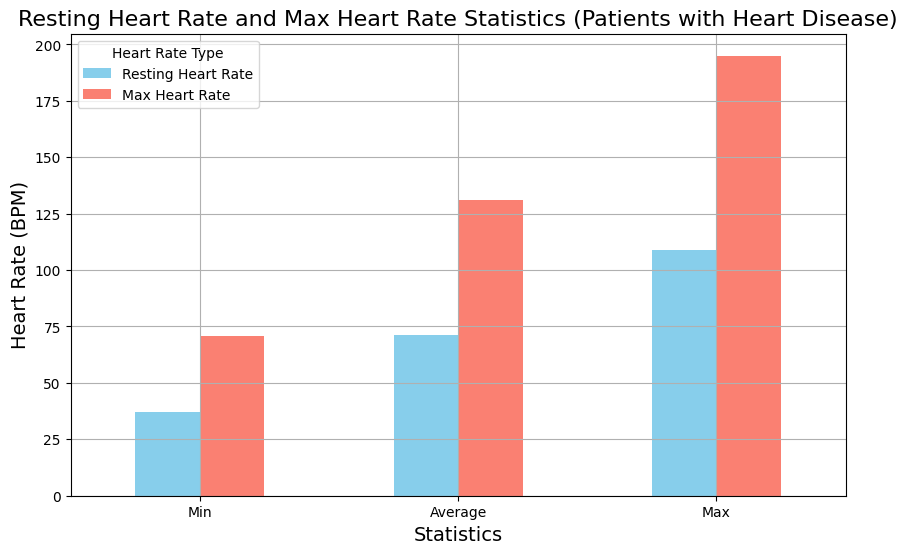

In [27]:
resting_heart_rate_stats = {
    'Min Resting Heart Rate': heart_disease_patients['resting_heart_rate'].min(),
    'Average Resting Heart Rate': heart_disease_patients['resting_heart_rate'].mean(),
    'Max Resting Heart Rate': heart_disease_patients['resting_heart_rate'].max()
}

max_heart_rate_stats = {
    'Min Max Heart Rate': heart_disease_patients['max_heart_rate'].min(),
    'Average Max Heart Rate': heart_disease_patients['max_heart_rate'].mean(),
    'Max Max Heart Rate': heart_disease_patients['max_heart_rate'].max()
}


print("Resting Heart Rate Stats:")
for key, value in resting_heart_rate_stats.items():
    print(f"{key}: {value:.2f}")

print("\nMax Heart Rate Stats:")
for key, value in max_heart_rate_stats.items():
    print(f"{key}: {value:.2f}")


stats_df = pd.DataFrame({
    'Resting Heart Rate': list(resting_heart_rate_stats.values()),
    'Max Heart Rate': list(max_heart_rate_stats.values())
}, index=['Min', 'Average', 'Max'])


plt.figure(figsize=(10, 6))
stats_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Resting Heart Rate and Max Heart Rate Statistics (Patients with Heart Disease)', fontsize=16)
plt.xlabel('Statistics', fontsize=14)
plt.ylabel('Heart Rate (BPM)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Heart Rate Type')
plt.grid(True)
plt.show()


In [26]:
high_resting_heart_rate = heart_disease_patients[heart_disease_patients['resting_heart_rate'] > 100]

# Count how many patients meet the criteria
count_high_resting_heart_rate = high_resting_heart_rate.shape[0]

print(f'Number of patients with heart disease and resting heart rate greater than 100: {count_high_resting_heart_rate}')


Number of patients with heart disease and resting heart rate greater than 100: 4


Patients exceeding max heart rate thresholds: {'40-50': 2, '50-60': 11, '60-70': 16, '70+': 1}
Total patients with heart disease in each age group: {'40-50': 26, '50-60': 88, '60-70': 85, '70+': 13}


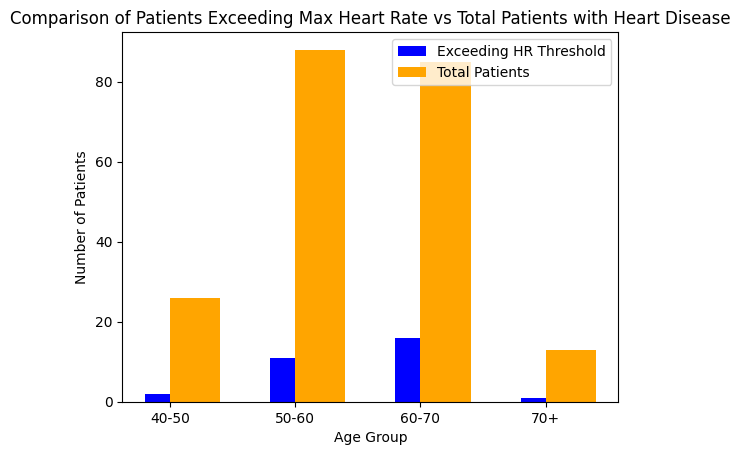

In [30]:
def count_patients_by_age_and_hr(data):
    results = {}
    total_counts = {}


    age_groups = {
        '40-50': (40, 50, 170),
        '50-60': (50, 60, 160),
        '60-70': (60, 70, 150),
        '70+': (70, float('inf'), 140)
    }

    for group, (lower, upper, hr_threshold) in age_groups.items():

        count_exceeding_hr = data[(data['age'] >= lower) &
                                   (data['age'] < upper) &
                                   (data['heart_disease_diagnosis'] == True) &
                                   (data['max_heart_rate'] > hr_threshold)].shape[0]


        total_count = data[(data['age'] >= lower) &
                           (data['age'] < upper) &
                           (data['heart_disease_diagnosis'] == True)].shape[0]

        results[group] = count_exceeding_hr
        total_counts[group] = total_count

    return results, total_counts


age_hr_counts, total_patient_counts = count_patients_by_age_and_hr(data)


print("Patients exceeding max heart rate thresholds:", age_hr_counts)
print("Total patients with heart disease in each age group:", total_patient_counts)


age_groups = list(age_hr_counts.keys())
exceeding_values = list(age_hr_counts.values())
total_values = list(total_patient_counts.values())

x = range(len(age_groups))  # the label locations

plt.bar(x, exceeding_values, width=0.4, label='Exceeding HR Threshold', color='blue', align='center')
plt.bar(x, total_values, width=0.4, label='Total Patients', color='orange', align='edge')


plt.title('Comparison of Patients Exceeding Max Heart Rate vs Total Patients with Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(x, age_groups)
plt.legend()
plt.show()


***ANALYSIS*** : The interpretation of heart rate distribution in the context of our dataset is tricky and not straight forward.

During a exercise test protocol, heart rates are recorded and can vary according to age, individual fitness and due to other factors like medications and underlying medical conditions, even normal individual variations that are normal.  

Resting heart rate is considered normal between 60 and 100 beats/ min (1). It can be lower than 60 and normal in certain patients. However, a resting heart rate above 100 prior to starting the test may suggest underlying issues like hyperthyroidism, arrhythmias, or high sympathetic tone. High resting heart rates are also associated with increased risk for coronary events (2). In our dataset:
  - Average resting heart rate was normal (just below 75 beats/min) in patients who had heart disease
  - Only 4 patients out of 217 (who have heart disease) had a resting heart rate above 100.

Maximum heart rate is even more complicated to interpret as varies according to age (as we get older, max heart rate lowers) (1). Excessive heart rate response ( called tachycardia) could be an indication of poor fitness, autonomic cardiac imbalance, or arrhythmias. During the test, excessively high heart rates (e.g., reaching above maximum of expected for patient's age: for example 40 and 50 years old max heart rate more than 170, between 50 and 60 years old had max heart rate more than 160, between 60 and 70 years old had a max heart rate more than 150 and above 70 years old had a max heart rate more than 140 ) may be a warning sign for arrhythmias or other heart conditions, especially if accompanied by chest pain or dizziness. In our dataset, on those patients diagnosed with heart disease :
  -  7% of patients between 40-50 years old had an abnormal max HR.
  - 12% of patient between 50-60 years old had an abnormal max HR.
  - 19% of patients between 60 and 70 years old had an abnormal max HR.
  - 8 % of patients older than 70 years old had an abnormal max HR.

 From previous analysis, we found most patients with heart disease were between 50-70 years old (50 to 60 for males and 60-70 for females). It seems this feature is not prominent between patients with heart disease, neither abnormal resting HR. Correlation and other diagnostic analysis will be done using this feature later on to assess statistically if indeed there is a lack of correlation between resting HR and max heart rate with heart disease in this dataset.



References:

(1) Cleveland Clinic. Heart Rate [Internet]. Cleveland Clinic; 2023 [cited 2024 Sep 28]. Available from: https://my.clevelandclinic.org/health/diagnostics/heart-rate

(2) Lauer MS, Froelicher ES, Williams M, Kligfield P. Exercise testing in asymptomatic adults: a statement for professionals from the American Heart Association Council on Clinical Cardiology, Subcommittee on Exercise, Cardiac Rehabilitation, and Prevention. Circulation. 2005;112(5):771-776. doi:10.1161/CIRCULATIONAHA.105.166780



## 8. How many pattients with heart disease had also diagnosis of hypertension? How many had family history of coronary artery disease?


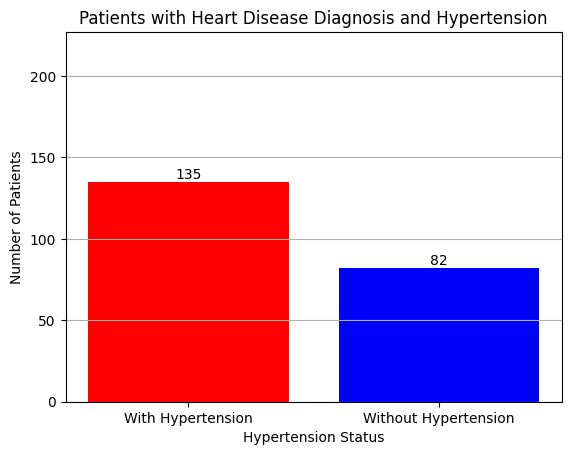

In [34]:
hypertension_count = data[(data['heart_disease_diagnosis'] == True) &
                          (data['has_hypertension'] == 1)].shape[0]


total_heart_disease_count = data[data['heart_disease_diagnosis'] == True].shape[0]


labels = ['With Hypertension', 'Without Hypertension']
counts = [hypertension_count, total_heart_disease_count - hypertension_count]


plt.bar(labels, counts, color=['red', 'blue'])
plt.title('Patients with Heart Disease Diagnosis and Hypertension')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Patients')
plt.ylim(0, total_heart_disease_count + 10)  # Adjust y-axis for better visualization
plt.grid(axis='y')


for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


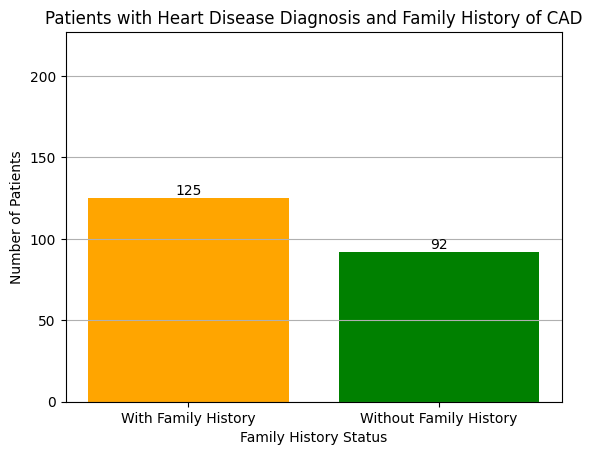

In [35]:
family_history_count = data[(data['heart_disease_diagnosis'] == True) &
                            (data['family_history_cad'] == True)].shape[0]


total_heart_disease_count = data[data['heart_disease_diagnosis'] == True].shape[0]


labels = ['With Family History', 'Without Family History']
counts = [family_history_count, total_heart_disease_count - family_history_count]


plt.bar(labels, counts, color=['orange', 'green'])
plt.title('Patients with Heart Disease Diagnosis and Family History of CAD')
plt.xlabel('Family History Status')
plt.ylabel('Number of Patients')
plt.ylim(0, total_heart_disease_count + 10)  # Adjust y-axis for better visualization
plt.grid(axis='y')


for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


***ANALYSIS***: In the chosen dataset, 62% with diagnosis of heart disease had also diagnosis of hypertension (HTN). Moreover, 57% had family history of CAD (coronary artery disease).

This is consistent with the vast literature recognizing HTN and family history of CAD as risk factors for cardiac disease, particularly IHD/CAD (1-3).

Some studies have elaborated on the direct correlations between hypertension and the risk of ischemic heart disease, detailing epidemiological evidence and pathophysiological insights (4).

Patients  with a family history of CAD are at significantly higher risk compared to those without such a background. Several interconnected factors, including genetic predispositions, shared environmental influences, and lifestyle choices play a part.

Certain genes may increase susceptibility to conditions such as hypertension, dyslipidemia, and diabetes, all of which are also risk factors for CAD. Research indicates that individuals with a first-degree relative who has being diagnosed with CAD are more likely to develop the disease themselves. Genetic factors account for a considerable proportion of CAD risk (5).

These features might play a role in our ML prediction of heart disease. We will find out, how important they will be for prediction later on after diagnostic analytics.


References:

(1) Kannel WB, Vasan RS. Hypertension and coronary artery disease: An overview. Journal of Hypertension. 2007;25(1):75-82.

(2) Wang Q, Yang S, Guo Q, et al. Family history of heart disease: The need for accurate assessment in primary care. BMJ Open. 2019;9(7)

(3) Kahanda L, Sweeney D, McKenzie H, et al. The Role of Family History in the Risk Assessment of Coronary Artery Disease. European Journal of Preventive Cardiology. 2020;27(6):590-601.

(4) Moraes RS, Duran AC, Gonçalves SC, et al. Hypertension and ischemic heart disease: A review. Heart Lung Circ. 2020;29(9):1363-1372.

(5) Lloyd-Jones DM, Nam BH, D'Agostino RB Sr, et al. "Estimating Future Cardiovascular Risk in Adults: A Scientific Statement From the American Heart Association." Journal of the American College of Cardiology. 2006;47(3): 676-694.



## 9. Smoking and IHD: proportion of smokers in patients with heart disease ?  Proportion of smokers in patients with heart disease with more than 20 pack-year smoking history?


Proportion of smokers among heart disease patients: 69.59%


<ipython-input-39-41d8ff36bbf9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette='Blues')


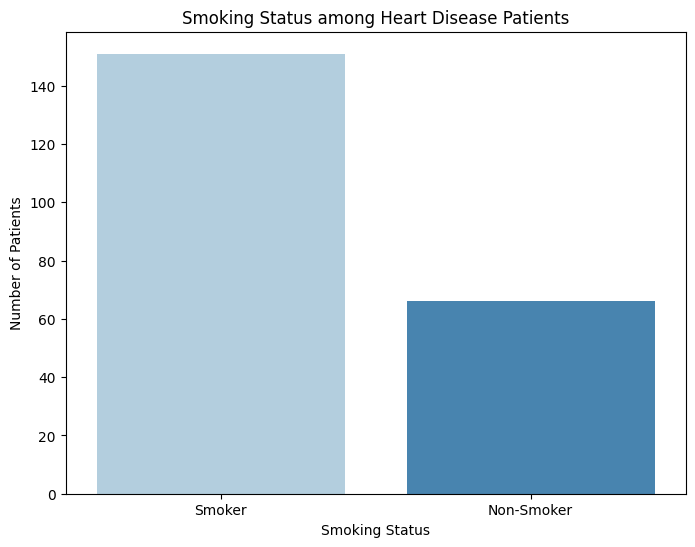

In [39]:
smokers_count = heart_disease_patients[heart_disease_patients['cigarettes_per_day'] > 1].shape[0]


total_heart_disease_patients = heart_disease_patients.shape[0]

proportion_smokers = smokers_count / total_heart_disease_patients if total_heart_disease_patients > 0 else 0


print(f'Proportion of smokers among heart disease patients: {proportion_smokers:.2%}')


smoking_status = heart_disease_patients['cigarettes_per_day'].apply(lambda x: 'Smoker' if x > 1 else 'Non-Smoker')
smoking_counts = smoking_status.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette='Blues')
plt.title('Smoking Status among Heart Disease Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()


Proportion of smokers with >20 pack years: 20.00%


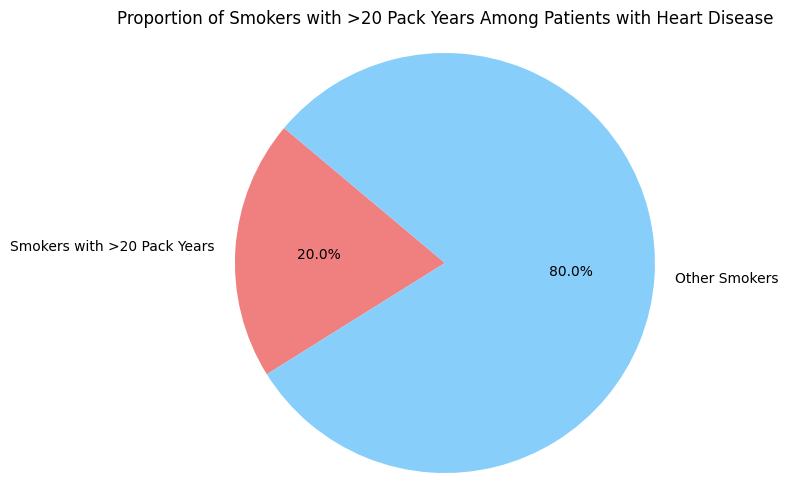

In [50]:
data = pd.DataFrame({
    'heart_disease_diagnosis': [True, True, True, True, False, True],
    'cigarettes_per_day': [10, 30, 5, 25, 0, 15],
    'years_smoking': [5, 15, 2, 3, 0, 20]
})


data['pack_years'] = (data['cigarettes_per_day'] * data['years_smoking']) / 20


heart_disease_patients = data[data['heart_disease_diagnosis'] == True]


smokers_high_pack_years = heart_disease_patients[heart_disease_patients['pack_years'] > 20]


proportion_high_pack_years = len(smokers_high_pack_years) / len(heart_disease_patients) * 100

print(f'Proportion of smokers with >20 pack years: {proportion_high_pack_years:.2f}%')


num_smokers_high_pack_years = len(smokers_high_pack_years)
num_other_smokers = len(heart_disease_patients) - num_smokers_high_pack_years


labels = ['Smokers with >20 Pack Years', 'Other Smokers']
sizes = [num_smokers_high_pack_years, num_other_smokers]
colors = ['lightcoral', 'lightskyblue']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Smokers with >20 Pack Years Among Patients with Heart Disease')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


***ANALYSIS***: Smoking and high pack-year history (> 20 pack-year) are significant risk factors for ischemic heart disease (IHD). Numerous studies have established a clear correlation between smoking, the cumulative impact of smoking over time (measured in pack-years), and the development of IHD (1-2).

A "pack-year" is a way to quantify smoking exposure, calculated as the number of packs of cigarettes smoked per day multiplied by the number of years a person has smoked. For example, smoking one pack per day for 10 years equals 10 pack-years.

In our dataset, 70% of patients with heart disease were smokers but only 20% had high pack-year history.

Smoking contributes to the development of atherosclerosis through mechanisms such as endothelial dysfunction, oxidative stress, and inflammatory responses, all of which are key factors in the pathogenesis of IHD (3).

Clinical guidelines emphasize the importance of smoking cessation programs in IHD and highlight the increased cardiovascular risk associated with prolonged smoking histories (4). Meta-analyses have shown that even after controlling for other risk factors, the relationship between smoking (especially at high pack-year levels) and IHD remains robust. Quitting smoking reduces the risk of IHD significantly over time, emphasizing that both current and past smoking habits are crucial in risk assessments (2,4).

Smoking is a prominent feature between patients with heart disease in our dataset, therefore might play a crucial role on prediction of the disease when training ML algorithms.


References:

(1) Circulation. Smoking and cardiovascular disease: An overview of the evidence. Available from: https://www.ahajournals.org/journal/circ

(2) The role of smoking in ischemic heart disease: A review. Available from: https://www.ahajournals.org/journal/res

(3) The impact of cigarette smoking on the development of atherosclerosis. Available from: https://academic.oup.com/ehj

(4) Smoking cessation and the risk of coronary heart disease. Available from: https://www.bmj.com






## 10. ECG (electrocardiogram) measures : Amount and percentage of patients with heart disease that showed LVH (left ventricular hypertrophy) in the ECG?

Total patients with heart disease: 217
Number of patients with Left Ventricular Hypertrophy: 85 (39.17%)


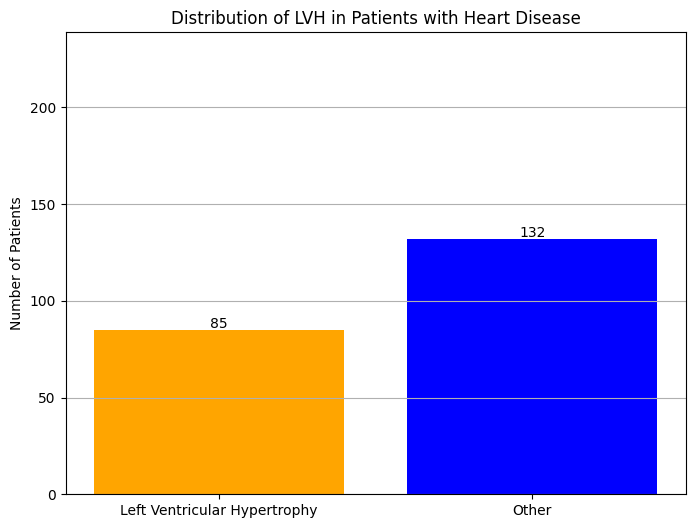

In [68]:
lv_hypertrophy_count = heart_disease_patients[heart_disease_patients['resting_ecg_results'] == 'Left Ventricular Hypertrophy'].shape[0]


total_heart_disease_count = heart_disease_patients.shape[0]


proportion_lv_hypertrophy = (lv_hypertrophy_count / total_heart_disease_count) * 100


print(f'Total patients with heart disease: {total_heart_disease_count}')
print(f'Number of patients with Left Ventricular Hypertrophy: {lv_hypertrophy_count} ({proportion_lv_hypertrophy:.2f}%)')


labels = ['Left Ventricular Hypertrophy', 'Other']
values = [lv_hypertrophy_count, total_heart_disease_count - lv_hypertrophy_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['orange', 'blue'])
plt.title('Distribution of LVH in Patients with Heart Disease')
plt.ylabel('Number of Patients')
plt.ylim(0, total_heart_disease_count * 1.1)  # Set y-axis limit for better visualization
plt.grid(axis='y')


for i in range(len(values)):
    plt.text(i, values[i] + 1, f'{values[i]}', ha='center')

plt.show()


**Analysis:** Left ventricular hypertrophy (LVH) and ischemic heart disease (IHD) are closely associated conditions, with LVH being recognized as a significant risk factor for the development of IHD. LVH is defined as the thickening of the heart's left ventricular walls, often due to chronic pressure overload conditions such as hypertension. This structural change in the heart can lead to impaired coronary blood flow, increasing the risk of myocardial ischemia (reduced blood supply to the heart) and subsequent ischemic heart disease. This is especially significant in those with additional risk factors such as hypertension and diabetes. However, LVH as an independent predictor of coronary heart disease, particularly in hypertensive individuals (1-2).

In the dataset analysed, 39% of patient with heart disease had LVH. This proportion might show of significance when predicting heart disease by statistics analysis to be conducted later in this project, especially in hypertensive patients, which is critical for preventing ischemic heart disease.

Reeferences:

(1) Levy D, Garrison RJ, Savage DD, Kannel WB, Castelli WP. Prognostic implications of echocardiographically determined left ventricular mass: The Framingham Heart Study. N Engl J Med. 1990;322(22):1561-6. doi:10.1056/NEJM199005313222203.

(2) Verdecchia P, Schillaci G, Borgioni C, Ciucci A, Gattobigio R, Zampi I, et al. Left ventricular hypertrophy as an independent predictor of cardiovascular risk in essential hypertension. J Hypertens. 1998;16(9):1149-55. doi:10.1097/00004872-199816090-00010.

